# Modelo de rendimiento en las pruebas Saber 11 2017-2019

## Cargar los modulos necesarios y los datos

In [1]:
# Importar modulos para el tratamiento de los datos y visualizaciones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos, se puede hacer desde una URL
# url = 'https://gitlab.com/jairo.acosta/saber11/-/raw/main/IGAE.csv'
df = pd.read_csv('C:/Users/jacos/Desktop/IGAE.csv', header=0)

## Formatear los datos

In [3]:
# Convertir la columna clase a valor numérico, observe que los valores antiguos
# Tienen una comilla simple de origen
df['RENDIMIENTO'] = df['RENDIMIENTO'].map(
    {"'Minimo o insuficiente'": 0, "'Satisfactorio o avanzado'": 1})

In [4]:
# Eliminar las comillas innecesarios en las otras columnas del dataframe
df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].str.replace("'",'')

In [5]:
df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].str.replace("'",'')

In [6]:
df['COLE_DEPTO_UBICACION'] = df['COLE_DEPTO_UBICACION'].str.replace("'",'')

In [7]:
df['COLE_NATURALEZA'] = df['COLE_NATURALEZA'].str.replace("'",'')

In [8]:
df['FAMI_NUMLIBROS'] = df['FAMI_NUMLIBROS'].str.replace("'",'')

In [9]:
df['FAMI_COMELECHEDERIVADOS'] = df['FAMI_COMELECHEDERIVADOS'].str.replace("'",'')

In [10]:
df['FAMI_COMECARNEPESCADOHUEVO'] = df['FAMI_COMECARNEPESCADOHUEVO'].str.replace("'",'')

In [11]:
df['ESTU_DEDICACIONINTERNET'] = df['ESTU_DEDICACIONINTERNET'].str.replace("'",'')

In [12]:
df['FAMI_PERSONASHOGAR'] = df['FAMI_PERSONASHOGAR'].str.replace("'",'')

In [13]:
df['ESTU_DEDICACIONLECTURADIARIA'] = df['ESTU_DEDICACIONLECTURADIARIA'].str.replace("'",'')

In [14]:
df['EDAD'] = df['EDAD'].str.replace("'",'')

In [15]:
# Revisar los efectos del formateo de texto
df.tail()

,FAMI_EDUCACIONMADRE,COLE_JORNADA,FAMI_EDUCACIONPADRE,FAMI_TIENEINTERNET,COLE_NATURALEZA,FAMI_NUMLIBROS,FAMI_TIENECOMPUTADOR,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,COLE_AREA_UBICACION,ESTU_DEDICACIONINTERNET,FAMI_PERSONASHOGAR,COLE_DEPTO_UBICACION,ESTU_DEDICACIONLECTURADIARIA,EDAD,RENDIMIENTO
269063,Primaria,TARDE,Bachillerato,No,OFICIAL,11 A 25 LIBROS,No,3 a 5 veces por semana,3 a 5 veces por semana,URBANO,Hasta 1 hora,5 a 6,BOLIVAR,Mas de 1 hora,\(15-19]\,1
269064,Bachillerato,MANANA,No aplica,Si,OFICIAL,11 A 25 LIBROS,Si,Todos o casi todos los dias,Todos o casi todos los dias,URBANO,Hasta 1 hora,5 a 6,ATLANTICO,Mas de 1 hora,\(15-19]\,1
269065,No aplica,MANANA,No aplica,No,OFICIAL,11 A 25 LIBROS,No,3 a 5 veces por semana,Todos o casi todos los dias,URBANO,Hasta 1 hora,7 o mas,CORDOBA,Mas de 1 hora,\(15-19]\,1
269066,Profesional,MANANA,Bachillerato,Si,NO OFICIAL,MAS DE 100 LIBROS,Si,3 a 5 veces por semana,Todos o casi todos los dias,URBANO,Entre 1 y 3 horas,3 a 4,CORDOBA,Hasta 1 hora,\(15-19]\,1
269067,Bachillerato,TARDE,Bachillerato,Si,OFICIAL,11 A 25 LIBROS,Si,1 o 2 veces por semana,3 a 5 veces por semana,URBANO,Hasta 1 hora,5 a 6,BOLIVAR,Hasta 1 hora,\(15-19]\,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269068 entries, 0 to 269067
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   FAMI_EDUCACIONMADRE           269068 non-null  object
 1   COLE_JORNADA                  269068 non-null  object
 2   FAMI_EDUCACIONPADRE           269068 non-null  object
 3   FAMI_TIENEINTERNET            269068 non-null  object
 4   COLE_NATURALEZA               269068 non-null  object
 5   FAMI_NUMLIBROS                269068 non-null  object
 6   FAMI_TIENECOMPUTADOR          269068 non-null  object
 7   FAMI_COMELECHEDERIVADOS       269068 non-null  object
 8   FAMI_COMECARNEPESCADOHUEVO    269068 non-null  object
 9   COLE_AREA_UBICACION           269068 non-null  object
 10  ESTU_DEDICACIONINTERNET       269068 non-null  object
 11  FAMI_PERSONASHOGAR            269068 non-null  object
 12  COLE_DEPTO_UBICACION          269068 non-null  object
 13 

## Crear las variables dummy

In [17]:
df = pd.get_dummies(df)

In [18]:
df.head()

,RENDIMIENTO,FAMI_EDUCACIONMADRE_Bachillerato,FAMI_EDUCACIONMADRE_No aplica,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria,FAMI_EDUCACIONMADRE_Profesional,FAMI_EDUCACIONMADRE_Tecnica o tecnologica,COLE_JORNADA_COMPLETA,COLE_JORNADA_MANANA,COLE_JORNADA_NOCHE,...,COLE_DEPTO_UBICACION_LA GUAJIRA,COLE_DEPTO_UBICACION_MAGDALENA,COLE_DEPTO_UBICACION_SAN ANDRES,COLE_DEPTO_UBICACION_SUCRE,ESTU_DEDICACIONLECTURADIARIA_Hasta 1 hora,ESTU_DEDICACIONLECTURADIARIA_Mas de 1 hora,ESTU_DEDICACIONLECTURADIARIA_No leo por entretenimiento,EDAD_\(-inf-15]\,EDAD_\(15-19]\,EDAD_\(19-inf)\
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269068 entries, 0 to 269067
Data columns (total 61 columns):
 #   Column                                                   Non-Null Count   Dtype
---  ------                                                   --------------   -----
 0   RENDIMIENTO                                              269068 non-null  int64
 1   FAMI_EDUCACIONMADRE_Bachillerato                         269068 non-null  uint8
 2   FAMI_EDUCACIONMADRE_No aplica                            269068 non-null  uint8
 3   FAMI_EDUCACIONMADRE_Postgrado                            269068 non-null  uint8
 4   FAMI_EDUCACIONMADRE_Primaria                             269068 non-null  uint8
 5   FAMI_EDUCACIONMADRE_Profesional                          269068 non-null  uint8
 6   FAMI_EDUCACIONMADRE_Tecnica o tecnologica                269068 non-null  uint8
 7   COLE_JORNADA_COMPLETA                                    269068 non-null  uint8
 8   COLE_JORNADA_MANANA               

In [20]:
# Eliminar las variables que no generan información al modelo
del df['FAMI_EDUCACIONMADRE_No aplica']

In [21]:
del df['FAMI_EDUCACIONPADRE_No aplica']

## Asignar valores de X e y

In [22]:
X = df.loc[:, df.columns!= 'RENDIMIENTO']

In [23]:
y = df['RENDIMIENTO']

## Crear el conjunto de entrenamiento y validación

In [24]:
# Cargar el modulo para dividir el conjunto de datos en conjunto de entrenamiento y validación
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape, X_test.shape

((215254, 58), (53814, 58))

## Modelo de regresión logística

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logistica = LogisticRegression()

### Ajustar el modelo a los datos

In [29]:
logistica.fit(X_train, y_train)

LogisticRegression()

### Parámetros $\theta$ del modelo

In [30]:
logistica.intercept_

array([-0.59470735])

In [31]:
logistica.coef_

array([[ 0.54254388,  1.16224045,  0.2995348 ,  0.72956265,  0.81315857,
         1.34442462,  0.82406669, -1.61364752, -2.15915204,  0.15261705,
         0.88186583,  0.1532217 ,  0.95983678,  0.03531922,  0.40948698,
         0.34762817, -0.4214956 , -0.14832977, -0.01916538, -0.55066   ,
        -0.31854047, -0.1589805 ,  0.24698345, -0.33928786, -0.35597831,
        -0.21384706, -0.11137265,  0.27124906, -0.73555552,  0.00585373,
        -0.06995965,  0.07178879, -0.62235426,  0.05069975, -0.68969361,
         0.11986824, -0.01573959, -0.14468308, -0.15976291, -0.24963979,
        -0.50499118,  0.20265774,  0.04758749, -0.31507943,  0.0965098 ,
         0.02887114, -0.06552886,  0.57873026, -0.68798667, -0.49563932,
        -0.34000274,  0.31522103,  0.36259377, -0.07417346, -0.85824569,
        -0.1510819 ,  0.4029412 , -0.82168468]])

### Predicción en el conjunto de validación

In [32]:
logistica_pred = logistica.predict(X_test)

In [33]:
logistica_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

### Métricas del modelo

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [35]:
confusion_matrix(y_test, logistica_pred)

array([[19136,  7704],
       [ 6874, 20100]], dtype=int64)

In [36]:
accuracy_score(y_test, logistica_pred)

0.7291039506448136

In [37]:
roc_auc_score(y_test, logistica_pred)

0.7290638653306044

## Modelo de árboles

In [38]:
from sklearn import tree

In [39]:
arbol = tree.DecisionTreeClassifier(max_depth = 4)

### Ajustar el modelo a los datos

In [40]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

### Predicción en el conjunto de validación

In [41]:
arbol_pred = arbol.predict(X_test)

In [42]:
arbol_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

### Métricas del modelo

In [43]:
confusion_matrix(y_test, arbol_pred)

array([[15590, 11250],
       [ 6915, 20059]], dtype=int64)

In [44]:
accuracy_score(y_test, arbol_pred)

0.6624484334931431

In [45]:
roc_auc_score(y_test, arbol_pred)

0.6622457520223978

### Gráfica del árbol

In [46]:
datos_graf = tree.export_graphviz(arbol, out_file = None, feature_names = X_train.columns,
                                  filled = True, class_names = ['Minimo o insuficiente','Satisfactorio o avanzado'])

In [47]:
from IPython.display import Image
import pydotplus

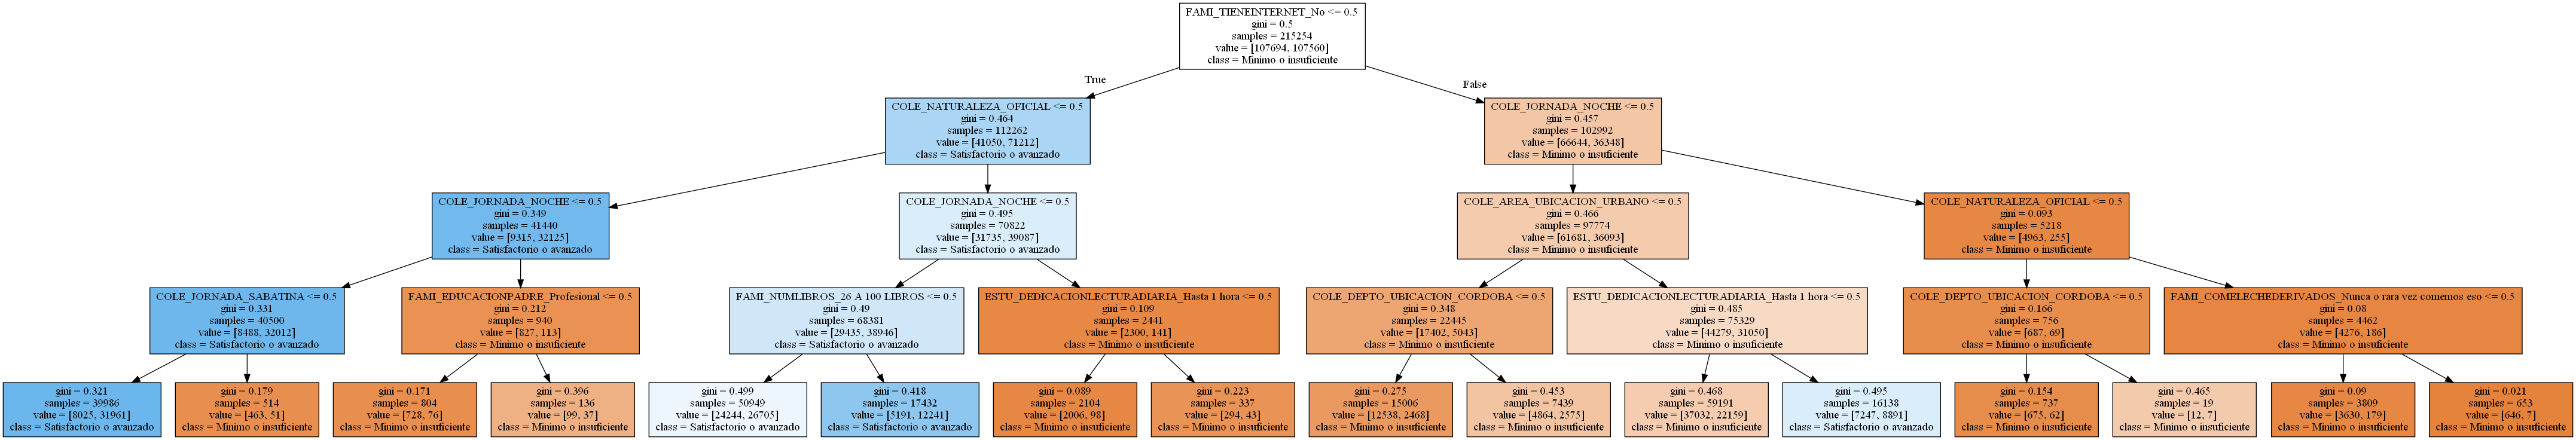

In [48]:
graph = pydotplus.graph_from_dot_data(datos_graf)
Image(graph.create_png())

In [49]:
# Guardar como un archivo
# graph.write_png('arboloriginalclass.png')

## Modelo de Perceptrón Multicapa

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
perceptron = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(5, 5), random_state=123, max_iter=10000, activation = 'logistic')

### Transformación de los datos

In [52]:
# Como es un modelo más complicado se escala el vector de características
# para que el modelo se ajuste a los datos de forma más ágil
from sklearn import preprocessing

In [53]:
escala = preprocessing.StandardScaler().fit(X_train)

In [54]:
X_esc = escala.transform(X_train)

In [55]:
X_esc_test = escala.transform(X_test)

### Ajustar el modelo a los datos

In [56]:
perceptron.fit(X_esc, y_train)

MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(5, 5),
              max_iter=10000, random_state=123, solver='lbfgs')

### Predicción en el conjunto de validación

In [57]:
perceptron_pred = perceptron.predict(X_esc_test)

In [58]:
perceptron_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

### Métricas del modelo

In [59]:
confusion_matrix(y_test, perceptron_pred)

array([[19476,  7364],
       [ 6898, 20076]], dtype=int64)

In [60]:
accuracy_score(y_test, perceptron_pred)

0.7349760285427583

In [61]:
roc_auc_score(y_test,perceptron_pred)

0.7349528225944132